Task 6.6 - Time Series Analysis

This Script Includes: 

1. Import libraries and data

2. Create subset

3. Decomposition

4. Test for stationarity

5. Check for autocorrelations

1. Import Libraries and Data

In [1]:
!pip install pandas_datareader
!pip install pandas

In [2]:
!pip install quandl

In [3]:
!pip install statsmodels

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from pandas_datareader import data as pdr
import datetime

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [5]:
df_time_series_global_price_cacao = pd.read_csv(r"C:\Users\Owner\Downloads\PCOCOUSDM - time series analysis.csv")


In [6]:
df_time_series_global_price_cacao.head(5)

,Date,USD_per_ton
0,1/1/1990,995.0
1,2/1/1990,1022.0
2,3/1/1990,1131.0
3,4/1/1990,1336.0
4,5/1/1990,1443.0


--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Create Subset 

In [7]:

# Convert 'Date' column to datetime format
df_time_series_global_price_cacao['Date'] = pd.to_datetime(df_time_series_global_price_cacao['Date'])

# Filter the data to include only the years from 2006 to 2017
df_time_global_price_cacao= df_time_series_global_price_cacao[(df_time_series_global_price_cacao['Date'].dt.year >= 2006) & 
                                                (df_time_series_global_price_cacao['Date'].dt.year <= 2017)]

# Display the aggregated DataFrame
df_time_global_price_cacao.head()


,Date,USD_per_ton
192,2006-01-01,1576.229801
193,2006-02-01,1545.401100
194,2006-03-01,1545.051276
195,2006-04-01,1552.340948
196,2006-05-01,1594.296279


In [8]:
df_time_global_price_cacao.shape

(144, 2)

In [9]:
df_time_global_price_cacao.columns

Index(['Date', 'USD_per_ton'], dtype='object')

In [10]:
df_time_global_price_cacao.set_index('Date', inplace=True)

In [11]:
df_time_global_price_cacao.head(5)

,USD_per_ton
Date,
2006-01-01,1576.229801
2006-02-01,1545.401100
2006-03-01,1545.051276
2006-04-01,1552.340948
2006-05-01,1594.296279


---------------------------------------------------------------------------------------------------------------------------------------------------------

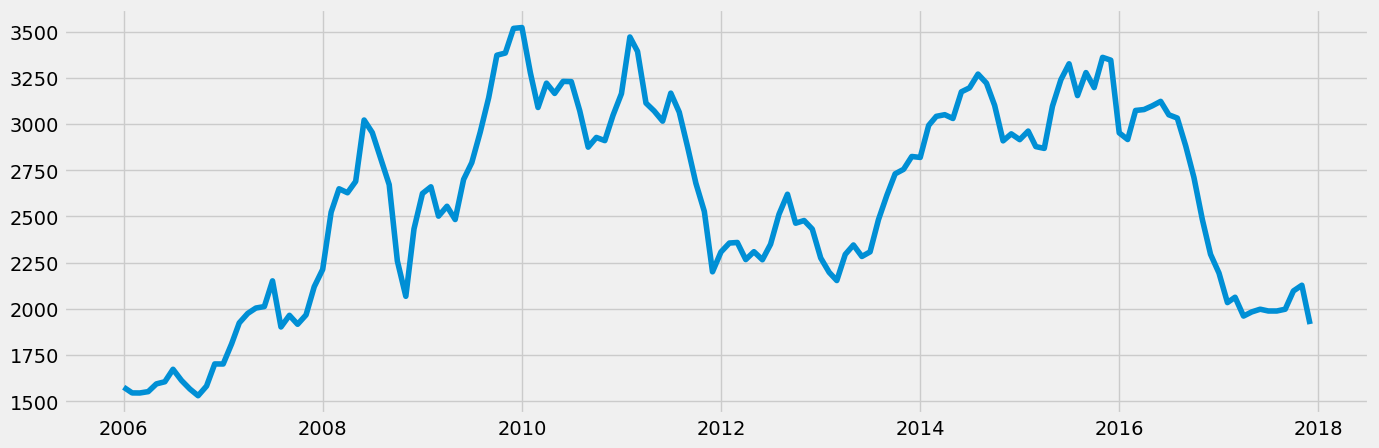

In [12]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_time_global_price_cacao)

Observation: The prices go up hitting its peak in 2010. Then down towards 2012 before it moves upward again in 2016 then low again
It appears that this up and down happens approximately every 4 years. So it appears that it could possibly be cyclical

In [13]:
# Check for missing values
df_time_global_price_cacao.isnull().sum() 

USD_per_ton    0
dtype: int64

In [14]:
dups = df_time_global_price_cacao.duplicated()
dups.sum()

0

---------------------------------------------------------------------------------------------------------------------------------------------------------

3. Decomposition 

In [15]:
df_time_global_price_cacao.reset_index(inplace=True)

In [17]:
df_time_global_price_cacao['Date'] = pd.to_datetime(df_time_global_price_cacao['Date'])

In [19]:
df_time_global_price_cacao.set_index('Date', inplace=True)


In [21]:
df_time_global_price_cacao['value_column'] = pd.to_numeric(df_time_global_price_cacao['USD_per_ton'])


In [27]:
decomposition = sm.tsa.seasonal_decompose(df_time_global_price_cacao['USD_per_ton'], model='additive')

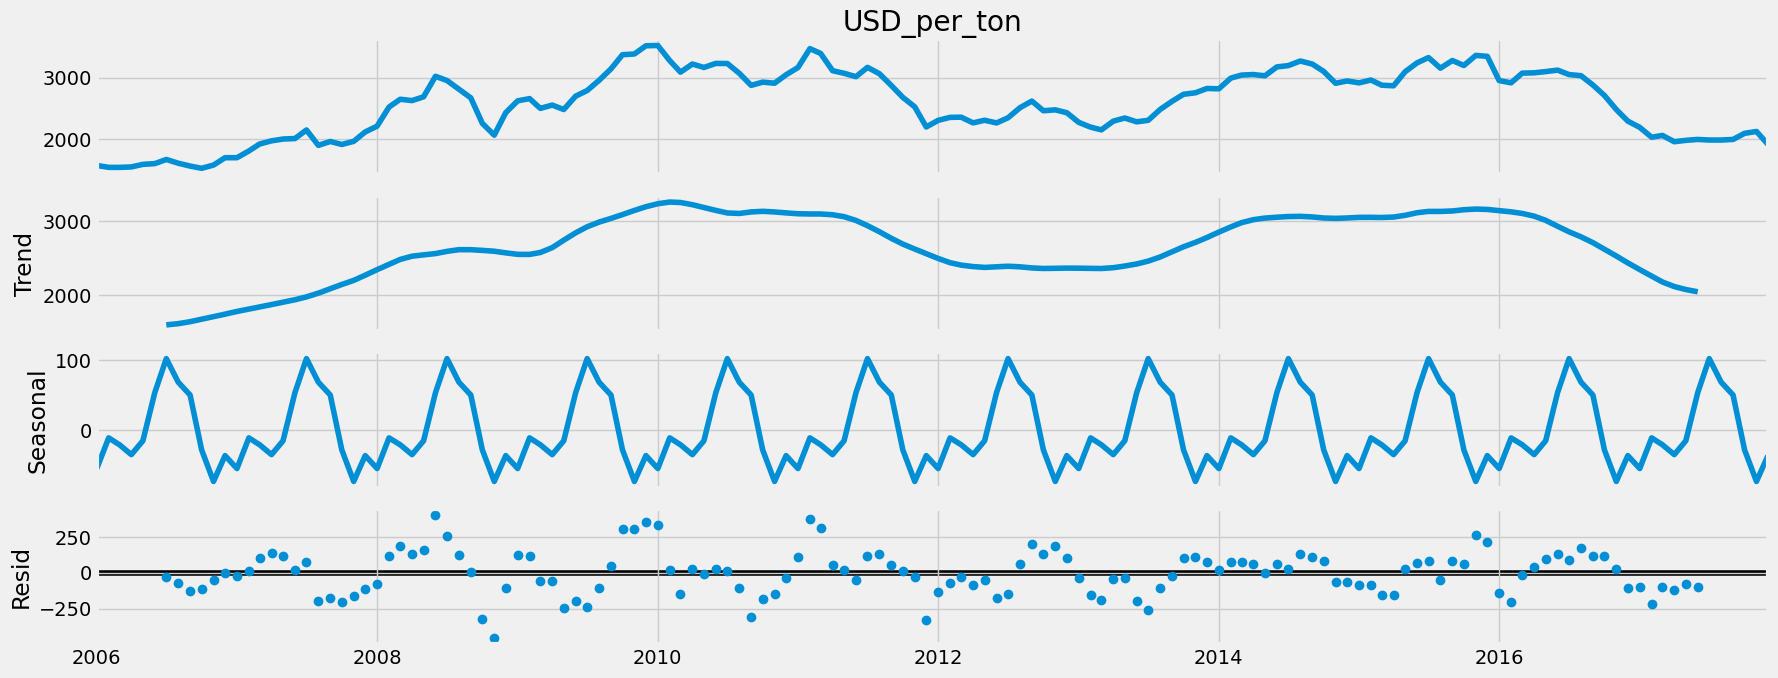

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7
# Plot the separate components
decomposition.plot()
plt.show()

Observation: 

Trend: From 2006 to 2016, the price shows an overall upward trend with some fluctuations. This indicates a general increase in the price of chocolate
over the years.
    
Seasonal: The pattern indicates strong seasonal effects. Prices peak and trough at regular intervals, likely corresponding to seasonal demand 
(e.g., holidays, festivals)

Residual: Random variations after accounting for trend and seasonality

-----------------------------------------------------------------------------------------------------------------------------------------------------------

4. Test for stationarity

In [41]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_time_global_price_cacao['USD_per_ton'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.283662
p-value                          0.177292
Number of Lags Used              1.000000
Number of Observations Used    142.000000
Critical Value (1%)             -3.477262
Critical Value (5%)             -2.882118
Critical Value (10%)            -2.577743
dtype: float64


Observation: Since the test statistic (-2.283662) is higher than all the critical values, and the p-value is greater than 0.05
This suggests that the time series data is non-stationary.

In [45]:
import pandas as pd

df_time_global_price_cacao['USD_per_ton'] = pd.to_numeric(df_time_global_price_cacao['USD_per_ton'])

# First difference
df_time_global_price_cacao['diff_1'] = df_time_global_price_cacao['USD_per_ton'].diff()

# Drop NaN values
df_time_global_price_cacao.dropna(inplace=True)

# Check the results
print(df_time_global_price_cacao.head())


            USD_per_ton  value_column     diff_1
Date                                            
2006-02-01  1545.401100   1545.401100 -30.828701
2006-03-01  1545.051276   1545.051276  -0.349824
2006-04-01  1552.340948   1552.340948   7.289672
2006-05-01  1594.296279   1594.296279  41.955331
2006-06-01  1605.780389   1605.780389  11.484110


In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_time_global_price_cacao['diff_1'])
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

Test Statistic: -8.882481551335575
p-value: 1.306602437349558e-14
Critical Values: {'1%': -3.477261624048995, '5%': -2.8821181874544233, '10%': -2.5777431104939494}


In [55]:
# 2nd difference
df_time_global_price_cacao['diff_2'] = df_time_global_price_cacao['diff_1'].diff()

# Drop NaN values
df_time_global_price_cacao.dropna(inplace=True)

# Check the results
print(df_time_global_price_cacao.head())



            USD_per_ton  value_column     diff_1      diff_2
Date                                                        
2006-04-01  1552.340948   1552.340948   7.289672    7.639496
2006-05-01  1594.296279   1594.296279  41.955331   34.665659
2006-06-01  1605.780389   1605.780389  11.484110  -30.471221
2006-07-01  1673.206545   1673.206545  67.426156   55.942046
2006-08-01  1612.942570   1612.942570 -60.263975 -127.690131


In [57]:
result = adfuller(df_time_global_price_cacao['diff_2'])
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

Test Statistic: -6.289878230295054
p-value: 3.621173592674015e-08
Critical Values: {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}


Observation: Since the test statistic (-6.29) is less than all the critical values and the p-value is very low (much less than 0.05)
This indicates that your time series is now stationary

---------------------------------------------------------------------------------------------------------------------------------------------------------

5. Check for autocorrelations

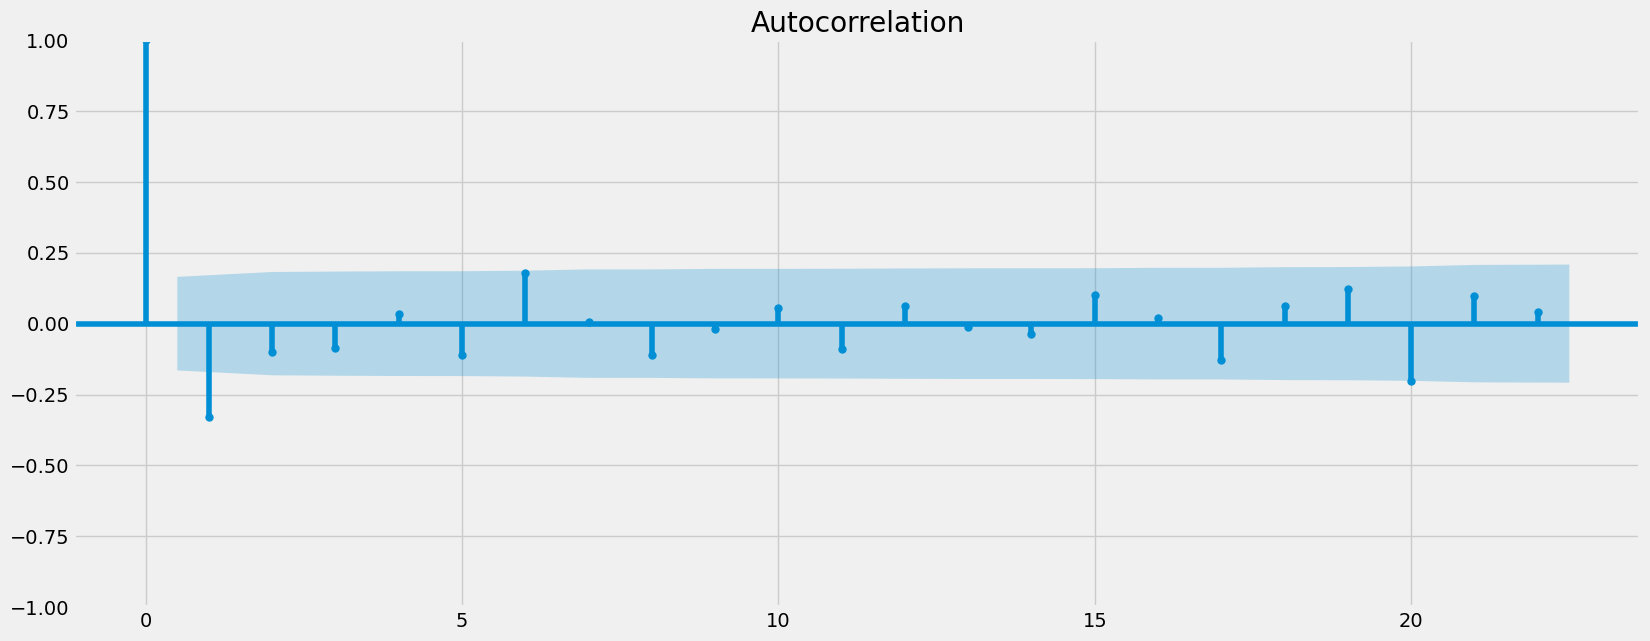

In [71]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_time_global_price_cacao['diff_2'].values)
plt.show()

Observation: There are two lags that are majorly outside of the confidence interval which means that the data is not perfectly stationary